# Apprentissage supervisé
---
*Chadrack MAYAMBA HATU - MAM5 - 2024/2025*

In [ ]:
import numpy as np
np.set_printoptions(threshold=10000,suppress=True)
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

## I. Apprentissage supervisé: Feature engineering et classification

L'objectif de cette partie est de construire un bon classifieur sur le jeu de données de crédit scoring.

### 1) Chargement des données et préparation

Dans un premier temps on importe les données :

In [ ]:
data = pd.read_csv("credit_scoring.csv", sep = ';')
data.head()

,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price,Status
0,9.0,1.0,60.0,30.0,0.0,1.0,1.0,73.0,129.0,0.0,0.0,800.0,846.0,1
1,17.0,1.0,60.0,58.0,1.0,1.0,0.0,48.0,131.0,0.0,0.0,1000.0,1658.0,1
2,10.0,0.0,36.0,46.0,0.0,2.0,1.0,90.0,200.0,3000.0,0.0,2000.0,2985.0,0
3,0.0,1.0,60.0,24.0,1.0,1.0,0.0,63.0,182.0,2500.0,0.0,900.0,1325.0,1
4,0.0,1.0,36.0,26.0,1.0,1.0,0.0,46.0,107.0,0.0,0.0,310.0,910.0,1


Ensuite, on transforme le jeu de données en Array et on sépare la variable a prédire et les covariables en deux tableaux différents

In [ ]:
data_array = data.values
X = data_array[:, :-1]
y = data_array[:, -1]


On souhaite alors analyser les données, leur taille, la distribution des exemples positifs et négatifs...


In [ ]:

n_obs, n_var = X.shape
print(f"Taille de l'échantillon: {n_obs} observartions et {n_var} variables")

unique, counts = np.unique(y, return_counts= True)
ratio = (counts/n_obs)*100

distribution_df = pd.DataFrame({
    'Classe': unique,
    'Nombre observations': counts,
    'Pourcentage (%)': ratio
})

distribution_df

Taille de l'échantillon: 4375 observartions et 13 variables


,Classe,Nombre observations,Pourcentage (%)
0,0.0,1216,27.794286
1,1.0,3159,72.205714


On remarque que les deux classes ne sont pas équilibrées. On a environ 72% des données qui sont prédites de classe 1. Cela donne également un indice sur la précision que devra atteindre notre classifieur. S'il a une accuracy inférieure à 72%, cela indiquera qu'il sera moins bon qu'un classifieur naif qui donne que toutes les observations sont de classe 1.

Par ailleurs, on peut également donner une interprétation à ces classes:
- Une observation classée 0 indique que le client ne rembourse pas le crédit.
- Une observation classée 1 indique que le client rembouse sont crédit.


Enfin, pour éviter d'avoir un résultat biaisé du classifieur, on sépare les données en deux parties :
- Une partie servira a l'apprentissage du classifieur (50% des données)
- L'autre servira à son évaluation (50%)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 1)

print(f"Taille de X: {X.shape}")
print(f"Taille de X_train : {X_train.shape}")
print(f"Taille de X_test : {X_test.shape} \n")
print(f"Taille de y : {y.shape}")
print(f"Taille de y_train : {y_train.shape}")
print(f"Taille de y_test : {y_test.shape}")

Taille de X: (4375, 13)
Taille de X_train : (2187, 13)
Taille de X_test : (2188, 13) 

Taille de y : (4375,)
Taille de y_train : (2187,)
Taille de y_test : (2188,)


### 2) Apprentissage et évaluation de modèles

Dans cette partie, on souhaite utiliser les algorithmes suivants :

- Un arbre CART (random_state = 1)
- KNN avec k = 5
- MultilayerPerceptrion à deux couches de tailles 40 et 20 et random_state = 1

On comparera les résultats obtenus à l'aide de ces algorithmes en utilisant une métrique personnalisée qui sera la moyenne de l'accuracy et la précision.

Dans ce cas, c'est la précision qui a plus de sens que le rappel. En effet on a :
- La précision reflète la proportion de prédictions positives correctes, c'est le critère choisi lorsque les faux positifs ont un cout élevé.
- Le rappel mesure la proportion de vrais positifs détéctés parmis les positifs, c'est le critère choisi lorsque les faux négatifs sont importants à maitriser.

Au vu du fait que l'on travaille avec des données de crédit scroing, ce qui coute le plus est d'accorder le crédit à quelqu'un qui ne le rembourse pas. Donc on choisit les deux critères à étudier sont l'accuracy et la précision.

In [ ]:
# Librairies
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score


def eval_classif(classif, X_train, X_test, y_train, y_test):

    classif.fit(X_train, y_train)

    y_pred = classif.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    metrique = (acc + prec )/2

    res={
        "Accuracy" : acc,
        "Precision": prec,
        "Métrique": metrique
    }

    return res



In [ ]:
res = []
# CART
cart = DecisionTreeClassifier(random_state = 1)
res_cart = eval_classif(cart, X_train, X_test, y_train, y_test)
res.append({"Algorithme": "CART", **res_cart})

# KNN
knn = KNeighborsClassifier(n_neighbors = 5)
res_KNN = eval_classif(knn, X_train, X_test, y_train, y_test)
res.append({"Algorithme": "KNN", **res_KNN})


# MLP
mlp = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
res_mlp = eval_classif(mlp, X_train, X_test, y_train, y_test)
res.append({"Algorithme": "MLP", **res_mlp})

res = pd.DataFrame(res)
print("Résultats des algorithmes : ")
res


Résultats des algorithmes : 


,Algorithme,Accuracy,Precision,Métrique
0,CART,0.727148,0.819417,0.773283
1,KNN,0.724863,0.770971,0.747917
2,MLP,0.705667,0.819293,0.762480


On remarque alors que l'algorithme **CART est le plus adapté** des 3 pour notre classification à ce stade. Il affiche une bonne balance entre précision et accuracy, le rendant robuste face au déséquilibre des classes.

KNN reste une bonne alternative mais est légèrement moins bon en terme de précision. MLP est lui bien moins performant en terme d'accuracy, cette dernière étant de 71% cela peut indiquer des difficultés à généraliser sur ce jeu de donnée au vu de la distribution des données.

### 3) Normalisation des variables continues

Pour que toutes les variables caractéristiques aient le meme poids dans la phase d'apprentissage, on normalise les données, cela permet à certains algorithmes de mieux fonctionner.


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
res_scaled = []
# CART
cart_scaled = DecisionTreeClassifier(random_state = 1)
res_cart_scaled = eval_classif(cart_scaled, X_train_scaled, X_test_scaled, y_train, y_test)
res_scaled.append({"Algorithme": "CART", **res_cart_scaled})

# KNN
knn_scaled = KNeighborsClassifier(n_neighbors = 5)
res_KNN_scaled = eval_classif(knn_scaled, X_train_scaled, X_test_scaled, y_train, y_test)
res_scaled.append({"Algorithme": "KNN", **res_KNN_scaled})


# MLP
mlp_scaled = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
res_mlp_scaled = eval_classif(mlp_scaled, X_train_scaled, X_test_scaled, y_train, y_test)
res_scaled.append({"Algorithme": "MLP", **res_mlp_scaled})

res_scaled = pd.DataFrame(res_scaled)
print("Résultats des algorithmes sur les données normalisées : ")
res_scaled

Résultats des algorithmes sur les données normalisées : 


,Algorithme,Accuracy,Precision,Métrique
0,CART,0.727148,0.818182,0.772665
1,KNN,0.752742,0.810602,0.781672
2,MLP,0.776508,0.838172,0.807340


In [ ]:
print("Résultats des algorithmes sur les données \"brutes\" : ")
print(res)

print("\n\n Résultats des algorithmes sur les données normalisées : ")
print(res_scaled)

Résultats des algorithmes sur les données "brutes" : 
  Algorithme  Accuracy  Precision  Métrique
0       CART  0.727148   0.819417  0.773283
1        KNN  0.724863   0.770971  0.747917
2        MLP  0.705667   0.819293  0.762480


 Résultats des algorithmes sur les données normalisées : 
  Algorithme  Accuracy  Precision  Métrique
0       CART  0.727148   0.818182  0.772665
1        KNN  0.752742   0.810602  0.781672
2        MLP  0.776508   0.838172  0.807340


Après normalisation, **MLP devient le meilleur algorithme** avec une moyenne des métriques de 0.807, suivi de près par KNN (0.782).
CART reste un choix stable et fiable, mais il ne profite pas de la normalisation, et son avantage disparaît face aux autres algorithmes.

Cette amélioration des performances pour MLP et KNN s'explique par leur sensibilité à l’échelle des variables, tandis que CART, basé sur des seuils de décision, n'est pas affecté par cette transformation.

### 4) Création de nouvelles variables caractéristiques par combinaison linéaire des variables initiales

Parfois, il peut être utile pour certains classifieurs de faire une réduction de dimmension sur les données afin d'augmenter le pouvoir discriminant du classifieur.

Pour cela, on peut par exemple appliquer une ACP sur nos données.


In [ ]:
from sklearn.decomposition import PCA

acp = PCA(n_components = 3)

X_train_acp = acp.fit_transform(X_train_scaled)
X_test_acp = acp.transform(X_test_scaled)


X_train_2 = np.hstack((X_train_scaled, X_train_acp))
X_test_2 = np.hstack((X_test_scaled, X_test_acp))


In [ ]:
res_acp = []
# CART
cart_acp  = DecisionTreeClassifier(random_state = 1)
res_cart_acp  = eval_classif(cart_acp , X_train_2, X_test_2, y_train, y_test)
res_acp.append({"Algorithme": "CART", **res_cart_acp })

# KNN
knn_acp = KNeighborsClassifier(n_neighbors = 5)
res_KNN_acp = eval_classif(knn_acp, X_train_2, X_test_2, y_train, y_test)
res_acp.append({"Algorithme": "KNN", **res_KNN_acp})


# MLP
mlp_acp = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
res_mlp_acp = eval_classif(mlp_acp, X_train_2, X_test_2, y_train, y_test)
res_acp.append({"Algorithme": "MLP", **res_mlp_acp})

res_acp = pd.DataFrame(res_acp)
print("Résultats des algorithmes apres ACP : ")
res_acp

Résultats des algorithmes apres ACP : 


,Algorithme,Accuracy,Precision,Métrique
0,CART,0.736289,0.832783,0.784536
1,KNN,0.756399,0.810396,0.783397
2,MLP,0.770110,0.826981,0.798545


In [ ]:
print("Résultats des algorithmes sur les données \"brutes\" : ")
print(res)

print("\n\n Résultats des algorithmes sur les données normalisées : ")
print(res_scaled)

print("\n\n Résultats des algorithmes après ACP : ")
print(res_acp)

Résultats des algorithmes sur les données "brutes" : 
  Algorithme  Accuracy  Precision  Métrique
0       CART  0.727148   0.819417  0.773283
1        KNN  0.724863   0.770971  0.747917
2        MLP  0.705667   0.819293  0.762480


 Résultats des algorithmes sur les données normalisées : 
  Algorithme  Accuracy  Precision  Métrique
0       CART  0.727148   0.818182  0.772665
1        KNN  0.752742   0.810602  0.781672
2        MLP  0.776508   0.838172  0.807340


 Résultats des algorithmes après ACP : 
  Algorithme  Accuracy  Precision  Métrique
0       CART  0.736289   0.832783  0.784536
1        KNN  0.756399   0.810396  0.783397
2        MLP  0.770110   0.826981  0.798545


On remarque que :
- CART devient légèrement plus performant après ACP, donc l’intégration des nouvelles dimensions peut être envisagée si l’objectif est d’améliorer la précision.
- KNN bénéficie plus de la normalisation que de l’ACP, donc l’ACP n’est pas forcément nécessaire.
- MLP fonctionne mieux avec les données normalisées mais sans ACP, ce qui indique que réduire la dimensionnalité n’aide pas ce modèle.

Sur la base des 3 tests fait, on remarque que c'est le **MLP** qui semble etre le meilleur classifieur mais **sans ACP** et **avec normalisation**.

### 5) Séléction de variables

La présence de certaines variables dites bruitées peut avoir un impact négatif sur les résultats d'apprentissage, c'est pourquoi il est important de faire de la séléction de variables.
Cela consiste en choisir le sous ensemble de variables les plus pertinentes à partir de toutes celles disponibles.

Pour determiner quelles sont les meilleures variables pour prédire si la personne va ou non rembourser le crédit, on utilise la méthode Random Forest.

Variables triées par importance : ['Income' 'Seniority' 'Price' 'Amount' 'Age' 'Assets' 'Expenses' 'Records'
 'Time' 'Job' 'Debt' 'Home' 'Marital']


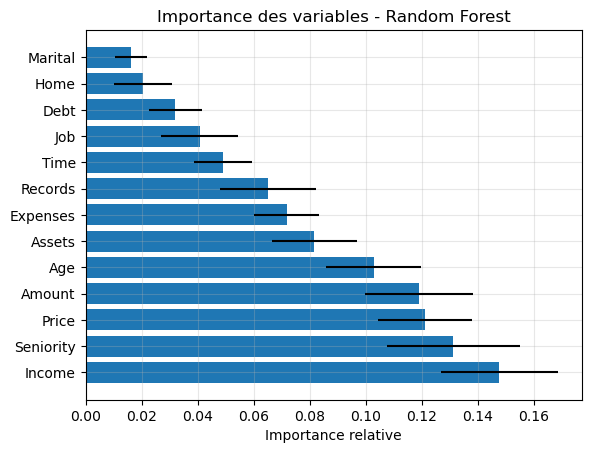

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=1)
clf.fit(X_train_scaled, y_train) # On choisit les données normalisées au vu du choix du modèle

# Importance des variables
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
sorted_idx = np.argsort(importances)[::-1]

features = data.columns.values
print("Variables triées par importance :", features[sorted_idx])

# Histogramme des importances
padding = np.arange(X_train_scaled.size/len(X_train_scaled))+0.5
plt.figure()
plt.barh(padding, importances[sorted_idx], xerr=std[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Importance relative")
plt.title("Importance des variables - Random Forest")
plt.grid(alpha = 0.3)
plt.show()

On remarque alors que les variables ayant le plus d'impact sur la réponse sont :
1. Income : les personnes ayant un revenu élevé ont une probabilité plus grande de rembourser le crédit.
2. Seniority : plus une personne est en poste depuis longtemps plus elle est percue comme fiable pour un remboursement.
3. Price : la somme emprunté joue également un role important

L'amount, l'age et les assets sont également importantes cependant marital, home et debts ne le sont pas tant que ca.

On souhaite alors determiner le nombre de variables à garder.

Nombre optimal de variables à garder : 8
Score maximal : 0.817


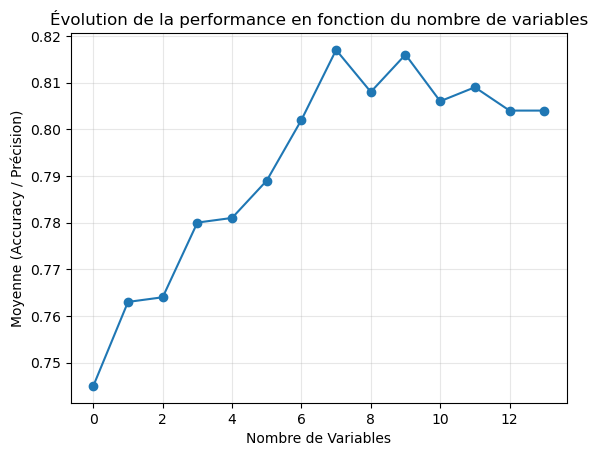

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(40, 20), random_state=1)
scores = np.zeros(X_train_scaled.shape[1] + 1)


for f in np.arange(0, X_train_scaled.shape[1] + 1):
    # Sélection des f meilleures variables
    X1_f = X_train_scaled[:, sorted_idx[:f + 1]]
    X2_f = X_test_scaled[:, sorted_idx[:f + 1]]

    # Entraînement et prédiction
    mlp.fit(X1_f, y_train)
    y_pred = mlp.predict(X2_f)

    # Calcul des métriques
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    metric_average = (acc + prec) / 2

    # Stockage du score
    scores[f] = np.round(metric_average, 3)

optimal_variables = np.argmax(scores) # Indice du score maximum
print(f"Nombre optimal de variables à garder : {optimal_variables+1}")
print(f"Score maximal : {scores[optimal_variables]:.3f}")

plt.figure()
plt.plot(scores, marker = 'o')
plt.xlabel("Nombre de Variables")
plt.ylabel("Moyenne (Accuracy / Précision)")
plt.title("Évolution de la performance en fonction du nombre de variables")
plt.grid(alpha=0.3)
plt.show()


On remarque que le nombre de variables à garder pour optimiser les performances est **8**.

On souhaite alors utiliser un GridSearchCV afin de donner les meilleurs paramètres possibles à notre algorithme. Pour cela, on doit choisir les meilleurs paramètres pour optimiser la métrique que l'on a mit en oeuvre depuis le début et on donnera le nombre de variables à garder.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score

# Nouvelles données
X_train_new = X_train_scaled[:, sorted_idx[:8]]
X_test_new = X_test_scaled[:, sorted_idx[:8]]


# Paramètres à tester
param_grid = {
    "hidden_layer_sizes": [(40, 20), (40, 10), (50, 30), (60, 30), (10, ), (40, 10, 10)],
    "activation": ["relu", "tanh", "logistic"]
}

# Definition de la metrique
def custom_metric(y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    return (acc + prec) / 2
custom_scorer = make_scorer(custom_metric, greater_is_better=True)


# Mise en place du GridSearchCV

mlp = MLPClassifier(random_state=1, max_iter=500)

grid_search = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring=custom_scorer,
    cv=5,
    n_jobs=-1
)

grid_search.fit(X_train_new, y_train)

# Meilleurs paramètres
best_params = grid_search.best_params_
print("Meilleurs paramètres trouvés :", best_params)

# Meilleure moyenne (accuracy + précision) / 2
best_score = grid_search.best_score_
print("Meilleure performance moyenne (accuracy + précision) :", round(best_score, 3))


Meilleurs paramètres trouvés : {'activation': 'logistic', 'hidden_layer_sizes': (40, 10, 10)}
Meilleure performance moyenne (accuracy + précision) : 0.8


In [ ]:
# Entraîner le modèle final avec les meilleurs paramètres
best_mlp = grid_search.best_estimator_
best_mlp.fit(X_train_new, y_train)

# Prédiction sur l'ensemble de test
y_test_pred = best_mlp.predict(X_test_new)

# Calcul des métriques finales
acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
final_metric = (acc_test + prec_test) / 2

print(f"Performance finale sur l'ensemble de test :\n"
      f"Accuracy : {round(acc_test, 3)}\n"
      f"Précision : {round(prec_test, 3)}\n"
      f"Moyenne (accuracy + précision) : {round(final_metric, 3)}")


Performance finale sur l'ensemble de test :
Accuracy : 0.781
Précision : 0.847
Moyenne (accuracy + précision) : 0.814


En utilisant GridSearchCV, nous avons optimisé les hyperparamètres du MLPClassifier sur les 8 variables sélectionnées. Les meilleurs paramètres trouvés sont : {'activation': 'logistic', 'hidden_layer_sizes': (40, 10, 10)}.

Avec ces réglages, la meilleure moyenne (accuracy + précision) sur les données de validation croisée est de 0.8. Sur les données de test, le modèle atteint une accuracy de 0.781, une précision de 0.847, et une moyenne (accuracy + précision) de 0.814.

Cela confirme la robustesse de notre approche et le bien-fondé de la sélection des variables.

### 6) Création d'un pipeline

On souhaite automatiser l'enchainement des traitements effectués : construction du classifieur, normalisation, acp, choix du nombre de paramètres etc. Pour cela, on créé une pipeline

- Création et sauvegarde du pipeline :

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
import pickle

# Meilleurs hyperparamètres trouvés pour le MLPClassifier
best_params = {'activation': 'logistic', 'hidden_layer_sizes': (40, 10, 10)}

# Création du pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Normalisation
    ('selector', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=1))),  # Sélection de variables
    ('classifier', MLPClassifier(random_state=1, max_iter=500, **best_params))  # Modèle optimisé
])

# Entraînement du pipeline sur les données complètes
pipeline.fit(X_train, y_train)

# Sauvegarde du pipeline dans un fichier pickle
with open('mlp_pipeline.pkl', 'wb') as f:
    pickle.dump(pipeline, f)

print("Pipeline sauvegardé avec succès dans 'mlp_pipeline.pkl'")


Pipeline sauvegardé avec succès dans 'mlp_pipeline.pkl'


- Chargement et utilisation du pipeline

In [ ]:
# Chargement du pipeline
with open('mlp_pipeline.pkl', 'rb') as f:
    loaded_pipeline = pickle.load(f)

# Scoring sur les données de test
y_test_pred = loaded_pipeline.predict(X_test)

# Évaluation des performances

acc_test = accuracy_score(y_test, y_test_pred)
prec_test = precision_score(y_test, y_test_pred)
final_metric = (acc_test + prec_test) / 2


print(f"Performance finale du pipeline :\n"
      f"Accuracy : {round(acc_test, 3)}\n"
      f"Précision : {round(prec_test, 3)}\n"
      f"Moyenne (accuracy + précision) : {round(final_metric, 3)}")


Performance finale du pipeline :
Accuracy : 0.762
Précision : 0.797
Moyenne (accuracy + précision) : 0.78


In [ ]:
# Paramètres du scaler (StandardScaler)
scaler_params = loaded_pipeline.get_params()['scaler']

# Paramètres du sélecteur (SelectFromModel)
selector_params = loaded_pipeline.get_params()['selector']

# Paramètres du classifieur final (MLPClassifier)
classifier_params = loaded_pipeline.get_params()['classifier']

print("Paramètres du StandardScaler :", scaler_params)
print("Paramètres du SelectFromModel :", selector_params)
print("Paramètres du MLPClassifier :", classifier_params)

Paramètres du StandardScaler : StandardScaler()
Paramètres du SelectFromModel : SelectFromModel(estimator=RandomForestClassifier(random_state=1))
Paramètres du MLPClassifier : MLPClassifier(activation='logistic', hidden_layer_sizes=(40, 10, 10),
              max_iter=500, random_state=1)


Le pipeline automatisé a été construit en intégrant les étapes essentielles de normalisation, sélection des 8 meilleures variables (via Random Forest) et classification optimisée (via un MLPClassifier avec des hyperparamètres tunés).

Apres normalisation des données et séléction automatique des variables importantes, les meilleurs paramètres pour le MLP incluent une fonction d’activation logistique et une architecture de couches cachées de 40, 10, et 10 neurones respectivement.

La performance finale sur les données de test atteint une accuracy de 0.762, une précision de 0.797, et une moyenne (accuracy + précision) de 0.78. Ces résultats confirment la robustesse et la pertinence de notre approche. Grâce à la sauvegarde sous forme de fichier pickle, ce pipeline est prêt à être déployé en production pour des phases de scoring sur de nouvelles données.

### 7) Comparaison de plusieurs algorithmes d'apprentissage

A présent, on veut tester les algorithmes suivants :
- NaiveBayesSimple
- Un arbre CART
- Un arbre ID3
- Un Decision Stump
- MultilayerPerceptron à deux couches de tailles respectives 20 et 10 par exemple
- k-plus-proches-voisins avec k=5 par exemple
- Bagging avec 200 classifieurs par exemple
- AdaBoost avec 200 classifieurs par exemple
- Random Forest avec 200 classifieurs par exemple
- Un XGboost avec 200 classifieurs par exemple

On s'appuiera sur :
- L'AUC en validation croisée (10-fold)
- L'accuracy et la précision
- Le temps d'execution pour chaque algorithme

Dans un premier temps, on créé une liste des algorithmes à comparer

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import time

# Définition des classifieurs à comparer
clfs = {
    'Naive Bayes': GaussianNB(),
    'CART': DecisionTreeClassifier(random_state=1),
    'ID3': DecisionTreeClassifier(criterion='entropy', random_state=1),
    'Decision Stump': DecisionTreeClassifier(max_depth=1, random_state=1),
    'MLP': MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1, max_iter=500),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Bagging': BaggingClassifier(n_estimators=200, random_state=1),
    'AdaBoost': AdaBoostClassifier(n_estimators=200, random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=1),
    'XGBoost': XGBClassifier(n_estimators=200, random_state=1, use_label_encoder=False, eval_metric='logloss')
}


Ensuite on créé la fonction qui pour chaque modèle :
- Execute l'algorithme avec une validation croisée 10-fold
- Calcule l'accuracy, la précision et l'auc
- Mesure le temps d'execution
- Affiche et stocke les résultats dans un dataframe

In [ ]:
from sklearn.model_selection import cross_val_score, KFold


# Définition du KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=0)

# Fonction pour exécuter les classifieurs
def run_classifiers(clfs, X, Y, normalize=False):
    results = []

    for name, clf in clfs.items():
        print(f"Évaluation du modèle : {name}")

        # Mesure du temps d'exécution
        start_time = time.time()

        # Normalisation des données si demandé
        if normalize:
            pipeline = Pipeline([('scaler', StandardScaler()), ('classifier', clf)])
        else:
            pipeline = clf

        # Validation croisée pour Accuracy
        cv_acc = cross_val_score(pipeline, X, Y, cv=kf, scoring='accuracy')
        acc_mean, acc_std = np.mean(cv_acc), np.std(cv_acc)

        # Validation croisée pour Précision
        cv_prec = cross_val_score(pipeline, X, Y, cv=kf, scoring='precision')
        prec_mean, prec_std = np.mean(cv_prec), np.std(cv_prec)

        # Validation croisée pour AUC
        cv_auc = cross_val_score(pipeline, X, Y, cv=kf, scoring='roc_auc')
        auc_mean, auc_std = np.mean(cv_auc), np.std(cv_auc)

        # Temps d'exécution
        elapsed_time = time.time() - start_time

        # Stocker les résultats
        results.append({
            "Modèle": name,
            "Accuracy (moy.)": round(acc_mean, 3),
            "Accuracy (écart-type)": round(acc_std, 3),
            "Précision (moy.)": round(prec_mean, 3),
            "Précision (écart-type)": round(prec_std, 3),
            "AUC (moy.)": round(auc_mean, 3),
            "AUC (écart-type)": round(auc_std, 3),
            "Temps d'exécution (s)": round(elapsed_time, 3)
        })

    # Affichage des résultats sous forme de DataFrame
    results_df = pd.DataFrame(results)
    return results_df


On peut alors executer la fonction sur les données :

In [ ]:
# Données brutes :
results_df = run_classifiers(clfs, X_train, y_train)
print("Résultats sur les données \"brutes\" :")
print(results_df)

# Données normalisées :
results_df_normalized = run_classifiers(clfs, X_train_scaled, y_train, normalize=True)
print("\n Résultats sur les données normalisées :")
print(results_df_normalized)



Évaluation du modèle : Naive Bayes
Évaluation du modèle : CART
Évaluation du modèle : ID3
Évaluation du modèle : Decision Stump
Évaluation du modèle : MLP
Évaluation du modèle : KNN
Évaluation du modèle : Bagging
Évaluation du modèle : AdaBoost
Évaluation du modèle : Random Forest
Évaluation du modèle : XGBoost
Résultats sur les données "brutes" :
           Modèle  Accuracy (moy.)  Accuracy (écart-type)  Précision (moy.)  \
0     Naive Bayes            0.766                  0.022             0.800   
1            CART            0.706                  0.031             0.798   
2             ID3            0.704                  0.033             0.791   
3  Decision Stump            0.721                  0.028             0.736   
4             MLP            0.706                  0.052             0.801   
5             KNN            0.710                  0.039             0.759   
6         Bagging            0.759                  0.020             0.808   
7        AdaBoost 

- Analyse des performances sur les données non normalisées

Sur les données brutes, Naives Bayes et random Forest ont obtenu les meilleurs résultats en terme d'accuracy tandis qu'AdaBoost affiche la meilleure précision. En terme d'AUC, c'est trandom forest qui maximise ce critère de discrimination entre les classes. En revanche CART et ID3 sont moins bons.
D'un point de vu temps d'execution, c'est Naives Bayes qui est le plus rapide.
C'est le modèle qu'on choisit comme le meilleur.

- Analyse des performances sur les données normalisées :

La normalisation semble avoir un effet significatif sur les modèles. Le MLP augmente son accuracy de 0.71 a 0.78 et sa précision de 0.8 a 0.83 ce qui en fait le meilleur modèle en terme de performances globales. Le KNN aussi améliore son accuracy. En revanche, les modèles basés sur les arberes de décsions ne sont eux pas addectés par la normalisation.
En terme d'AUC c'est toujours el MLP qui atteint la meilleure métrique suivit de random forest et AdaBoost ce qui le place en tant que modèle le mieux apte a distinguer les classes positifs et négatives. En revanche c'est aussi le plus long a l'execution mettant plus de 236 secondes quand certains comme random forest ou adaboost qui sont assez performant mettent envirion 1 min.


- Choix du modèle :

**Sans contrainte de temps**, on choisit le **MLP avec normalisation** en raison de sa capacité à capturer les relations complexes entre les variables. Si l'on veut un modèle **équilibré** on se tournera plus vers **Random Forest** ou **AdaBoost** permettant un bon compromis entre temps et résultats.
Enfin, si le **temps** est très imporant, le modèle a choisir est le **Naive Bayes**

## II - Apprentissage supervisé : Données hétérogènes

L'objectif de cette partie est de faire une étude comparative entre plusieurs algorithmes d'apprentisssage supervisé sur un nouveauu jeu de données de crédit scoring.

Le fichier de données comporte 688 instantes décrites par 15 variables caractéristiques. La variable à prédire est "classe" (dernière colonne du fichier) et est de nature nominale possedant un nombre fini de valeurs ("+" et "-").

Les exemples de ce jeu de données représentent des personnes pour lesquels un crédit a été accordé où non.

### 1) Préparation des données

- **Chargement des données et préparation**

Dans un premier temps, on ne considère que les caractéristiques continues (numériques) de ce jeu de données sans les données manquantes